# DMCT Lab Sessional 1 and 2

In [1]:
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as patch
%matplotlib inline

### 1. Fetch IRIS Dataset

In [2]:
IRIS_FILE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file = requests.get(IRIS_FILE_URL).text

### 2. Formatting Data

In [3]:
# store in a list
words = [word.split(",")
               for word in file.split("\n") 
               if len(word) > 0]
print(words[:10])

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']]


In [4]:
# convert to dataframe
words_dataframe = pd.DataFrame(words, columns=["A", "B", "C", "D", "category"])

In [5]:
# convert to numeric
words_dataframe[["A", "B", "C", "D"]] = words_dataframe[["A", "B", "C", "D"]].apply(pd.to_numeric)

### 3. Overview of the Data

In [6]:
#head
words_dataframe.head()

,A,B,C,D,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#summary
words_dataframe.describe()

,A,B,C,D
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#tail
words_dataframe.tail()

,A,B,C,D,category
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 4. A Scatterplot

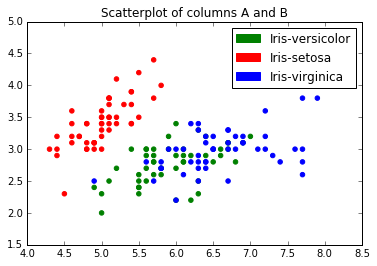

In [9]:
color = {
    'Iris-setosa': "red",
    'Iris-versicolor': "green",
    'Iris-virginica': "blue"
}

plt.figure(dpi=120)
plot = plt.scatter(words_dataframe["A"].values, 
                   words_dataframe["B"].values, 
                   color=[color[label] for label in words_dataframe["category"].values])
#legend
legend_handles = [patch.Patch(color=color[label], label=label) for label in color]
legend = plt.legend(handles=legend_handles)
title = plt.title("Scatterplot of columns A and B")

### 5. Histogram for each Column

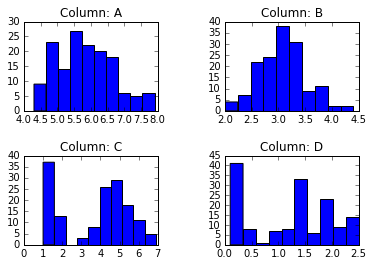

In [10]:
fig = plt.figure(dpi=120)
for i in range(0,4):
    row_num = 220 + i + 1
    obj = fig.add_subplot(row_num)
    obj.hist(words_dataframe.iloc[:, i].values, edgecolor='black')
    obj.set_title("Column: " + chr(ord("A") + i))
# manage spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### 6. Boxplot describing each Column

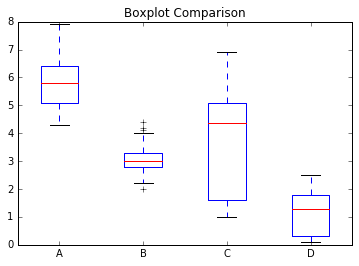

In [11]:
# boxplots
def draw_boxplots(data, title):
    plt.figure(dpi=120)
    labels = ("A", "B", "C", "D")
    plot = plt.boxplot(data, labels=labels)
    title = plt.title(title)
    
draw_boxplots([words_dataframe.iloc[:, i].values for i in range(0, 4)], "Boxplot Comparison")

### 7. Min Max Scaling

In [12]:
min_max_scaler = lambda column: (column - column.min(axis=0)) / (column.max() - column.min())
scaled_data = words_dataframe[["A", "B", "C", "D"]].apply(min_max_scaler, axis=0)

In [13]:
# summary of scaled data
scaled_data.describe()

,A,B,C,D
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


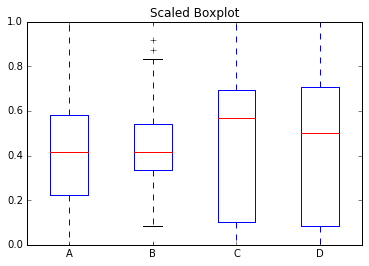

In [14]:
draw_boxplots([scaled_data.iloc[:, i].values for i in range(0, 4)], "Scaled Boxplot")